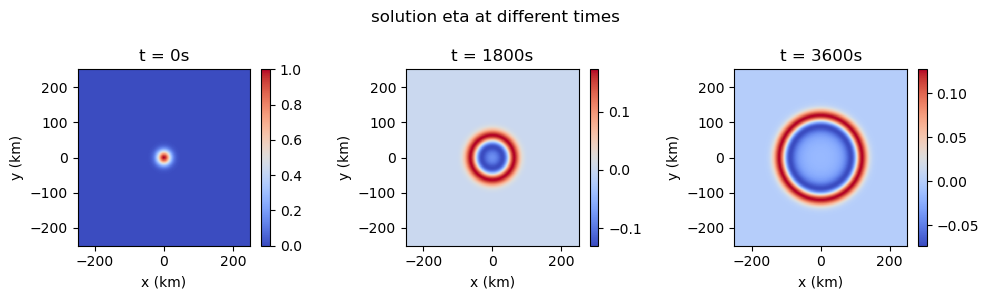

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import  fftshift,fft2, ifft2, ifftshift

# Constants
h = 100
g = 9.81
a_x = 20e3
a_y = 20e3
m_val = 2

# Domain
x_vals = np.linspace(-250e3, 250e3, 501)
y_vals = np.linspace(-250e3, 250e3, 501)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)

# Initial condition
f_vals = np.exp(-(X_vals / a_x) ** m_val) * np.exp(-(Y_vals / a_y) ** m_val)


k_vals = 2 * np.pi * fftshift(np.fft.fftfreq(len(x_vals), x_vals[1] - x_vals[0]))
l_vals = 2 * np.pi * fftshift(np.fft.fftfreq(len(y_vals), y_vals[1] - y_vals[0]))
K_vals, L_vals = np.meshgrid(k_vals, l_vals)
omega_vals = np.sqrt(g * h * (K_vals ** 2 + L_vals ** 2))
f_vals = fftshift(fft2(f_vals))

def eta_solution(t_val):
    # Compute the solution in the frequency domain at time t_val
    Eta_kl_vals = f_vals * np.cos(omega_vals * t_val)

    # Compute the inverse 2D FFT to obtain the solution in the spatial domain
    return np.real(ifft2(ifftshift(Eta_kl_vals)))


# Plot
fig = plt.figure(figsize=(10, 3))


time_vals = [0, 1800, 3600]
for i, t_val in enumerate(time_vals):
    eta_vals = eta_solution(t_val)
    ax_vals = fig.add_subplot(1, 3, i + 1)
    cb_vals = ax_vals.pcolormesh(X_vals / 1e3, Y_vals / 1e3, eta_vals, cmap='coolwarm')
    ax_vals.set_title(f't = {t_val}s')
    ax_vals.set_xlabel('x (km)')
    ax_vals.set_ylabel('y (km)')
    fig.colorbar(cb_vals, ax=ax_vals)

plt.suptitle('solution eta at different times')
plt.tight_layout()
plt.show()


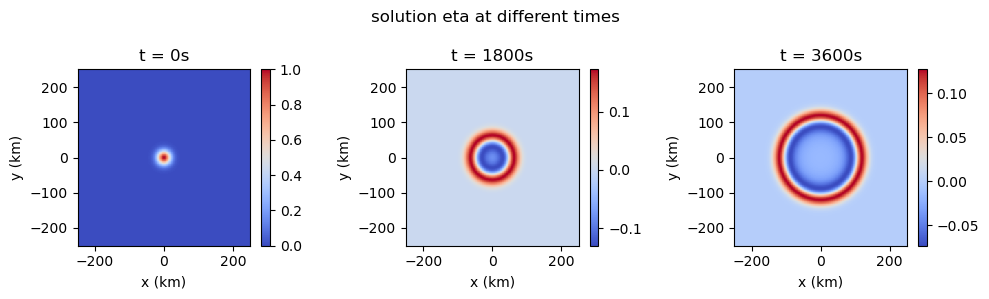

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import  fftshift,fft2, ifft2, ifftshift

# Constants
L=500000
h = 100
g = 9.81
a_x = 20e3
a_y = 20e3
m_val = 2

# Domain
x_vals = np.linspace(-L/2, L/2, 251)
y_vals = np.linspace(-L/2, L/2, 251)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)

# Initial condition
f_vals = np.exp(-(X_vals / a_x) ** m_val) * np.exp(-(Y_vals / a_y) ** m_val)


k_vals = 2 * np.pi * fftshift(np.fft.fftfreq(len(x_vals), x_vals[1] - x_vals[0]))
l_vals = 2 * np.pi * fftshift(np.fft.fftfreq(len(y_vals), y_vals[1] - y_vals[0]))
K_vals, L_vals = np.meshgrid(k_vals, l_vals)
omega_vals = np.sqrt(g * h * (K_vals ** 2 + L_vals ** 2))
f_vals = fftshift(fft2(f_vals))

def eta_solution(t_val):
    # Compute the solution in the frequency domain at time t_val
    Eta_kl_vals = f_vals * np.cos(omega_vals * t_val)

    # Compute the inverse 2D FFT to obtain the solution in the spatial domain
    return np.real(ifft2(ifftshift(Eta_kl_vals)))


# Plot
fig = plt.figure(figsize=(10, 3))


time_vals = [0, 1800, 3600]
for i, t_val in enumerate(time_vals):
    eta_vals = eta_solution(t_val)
    ax_vals = fig.add_subplot(1, 3, i + 1)
    cb_vals = ax_vals.pcolormesh(X_vals / 1e3, Y_vals / 1e3, eta_vals, cmap='coolwarm')
    ax_vals.set_title(f't = {t_val}s')
    ax_vals.set_xlabel('x (km)')
    ax_vals.set_ylabel('y (km)')
    cbar=fig.colorbar(cb_vals, ax=ax_vals)

plt.suptitle('solution eta at different times')
plt.tight_layout()
plt.show()


In [14]:
ax = 20000
ay = 20000
dx = 2000
dy = 2000
X = np.arange(-250000,250000,dx)
Y = np.arange(-250000,250000+dx,dy)
X_2d, Y_2d = np.meshgrid(X, Y)
Lx = 500000
Ly = 500000
Nx = Lx/dx
Ny = Ly/dy
m = 2
g = 9.81
H = 100
dt = 1
t = np.arange(0,3601,dt)

In [15]:
print(X)

[-250000 -248000 -246000 -244000 -242000 -240000 -238000 -236000 -234000
 -232000 -230000 -228000 -226000 -224000 -222000 -220000 -218000 -216000
 -214000 -212000 -210000 -208000 -206000 -204000 -202000 -200000 -198000
 -196000 -194000 -192000 -190000 -188000 -186000 -184000 -182000 -180000
 -178000 -176000 -174000 -172000 -170000 -168000 -166000 -164000 -162000
 -160000 -158000 -156000 -154000 -152000 -150000 -148000 -146000 -144000
 -142000 -140000 -138000 -136000 -134000 -132000 -130000 -128000 -126000
 -124000 -122000 -120000 -118000 -116000 -114000 -112000 -110000 -108000
 -106000 -104000 -102000 -100000  -98000  -96000  -94000  -92000  -90000
  -88000  -86000  -84000  -82000  -80000  -78000  -76000  -74000  -72000
  -70000  -68000  -66000  -64000  -62000  -60000  -58000  -56000  -54000
  -52000  -50000  -48000  -46000  -44000  -42000  -40000  -38000  -36000
  -34000  -32000  -30000  -28000  -26000  -24000  -22000  -20000  -18000
  -16000  -14000  -12000  -10000   -8000   -6000   

In [16]:
t = np.arange(0,3601,dt)

In [17]:
print(len(t))

3601


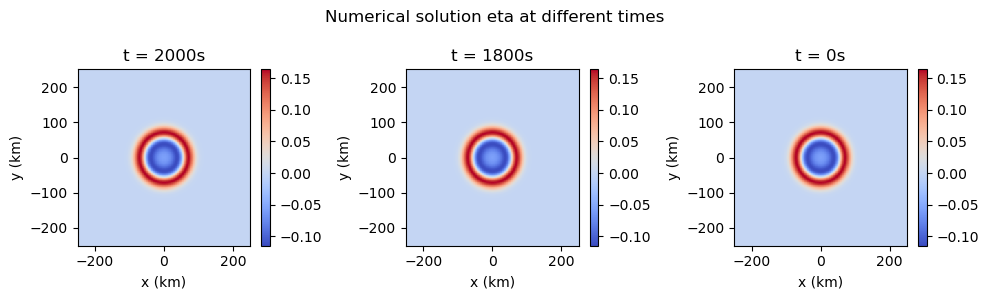

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 500000
H = 100
g = 9.81
a_x = 20e3
a_y = 20e3
m_val = 2
dx = dy = 2e3
dt = dx / np.sqrt(2 * g * H)
c = np.sqrt(g * H)
time_steps = [2000, 1800, 0]
# Domain
x_vals = np.linspace(-L / 2, L / 2, int(L / dx) + 1)
y_vals = np.linspace(-L / 2, L / 2, int(L / dy) + 1)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)

# Initial condition
eta = np.exp(-(X_vals / a_x) ** m_val) * np.exp(-(Y_vals / a_y) ** m_val)

# Initialize grid
eta_new = np.zeros_like(eta)
eta_old = eta.copy()

def leapfrog_update(eta, eta_old):
    eta_new[1:-1, 1:-1] = (2 - 2 * c**2 * dt**2 / dx**2 - 2 * c**2 * dt**2 / dy**2) * eta[1:-1, 1:-1] - eta_old[1:-1, 1:-1] + \
        (c**2 * dt**2 / dx**2) * (eta[:-2, 1:-1] + eta[2:, 1:-1]) + \
        (c**2 * dt**2 / dy**2) * (eta[1:-1, :-2] + eta[1:-1, 2:])
    return eta_new, eta

# Plot
fig = plt.figure(figsize=(10, 3))

t_val = 0
for i, t_end in enumerate(time_steps):
    while t_val < t_end:
        eta_new, eta_old = leapfrog_update(eta, eta_old)
        eta_old = eta.copy()
        eta = eta_new.copy()
        t_val += dt

    ax = fig.add_subplot(1, 3, i + 1)
    cb = ax.pcolormesh(X_vals / 1e3, Y_vals / 1e3, eta, cmap='coolwarm')
    ax.set_title(f't = {t_end}s')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    cbar = fig.colorbar(cb, ax=ax)

plt.suptitle('Numerical solution eta at different times')
plt.tight_layout()
plt.show()


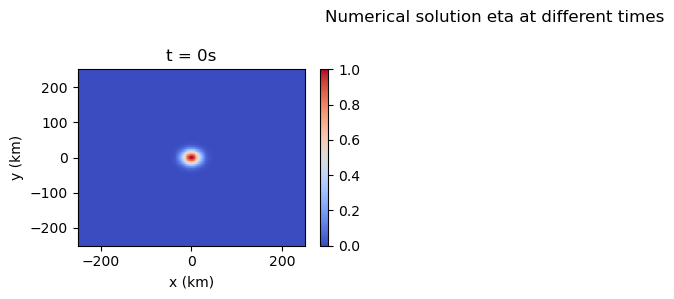

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 500000
H = 100
g = 9.81
a_x = 20e3
a_y = 20e3
m_val = 2
dx = dy = 2e3
c = np.sqrt(g * H)
dt = dx / (c * np.sqrt(2))

# Domain
x_vals = np.linspace(-L/2, L/2, int(L/dx) + 1)
y_vals = np.linspace(-L/2, L/2, int(L/dy) + 1)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)

# Initial condition
f_vals = np.exp(-(X_vals / a_x) ** m_val) * np.exp(-(Y_vals / a_y) ** m_val)

def leapfrog_update_eta(eta_prev, eta_curr):
    eta_next = np.zeros_like(eta_curr)

    for i in range(1, eta_curr.shape[0] - 1):
        for j in range(1, eta_curr.shape[1] - 1):
            eta_next[i, j] = (
                2 * eta_curr[i, j] - eta_prev[i, j]
                + c**2 * dt**2 * (
                    (eta_curr[i + 1, j] - 2 * eta_curr[i, j] + eta_curr[i - 1, j]) / dx**2
                    + (eta_curr[i, j + 1] - 2 * eta_curr[i, j] + eta_curr[i, j - 1]) / dy**2
                )
            )

    return eta_next

# Initialize eta arrays
eta_prev = np.zeros_like(f_vals)
eta_curr = f_vals
eta_next = np.zeros_like(f_vals)

# Time iterations
time_vals = [0, 1800, 3600]
eta_solutions = [eta_curr]

for t in np.arange(dt, max(time_vals) + dt, dt):
    eta_next = leapfrog_update_eta(eta_prev, eta_curr)
    eta_prev = eta_curr
    eta_curr = eta_next

    if int(t) in time_vals[1:]:
        eta_solutions.append(eta_curr)

# Plot
fig = plt.figure(figsize=(10, 3))

for i, (t_val, eta_val) in enumerate(zip(time_vals, eta_solutions)):
    ax = fig.add_subplot(1, 3, i + 1)
    cb = ax.pcolormesh(X_vals / 1e3, Y_vals / 1e3, eta_val, cmap='coolwarm')
    ax.set_title(f't = {t_val}s')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    cbar = fig.colorbar(cb, ax=ax)

plt.suptitle('Numerical solution eta at different times')
plt.tight_layout()
plt.show()
